In [19]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
dates_path = 'COVID AMP - Data Export 2021-01-26.xlsx'
dates_df = pd.read_excel(dates_path,  engine='openpyxl')

In [3]:
STATE_HOME_DATE = '2020-03-19'

In [66]:
air_path = '../combined_data.csv'
air_df = pd.read_csv(air_path)
air_df = air_df[air_df['County'] == 'Los_Angeles']
air_df = air_df.drop(['new_deaths', 'Unnamed: 0', 'County'], axis=1)
air_df = air_df.set_index('Date')

In [67]:
air_df

,no2,ozone,pm25
Date,,,
2020-01-26,0.020,0.040,47.3
2020-01-27,0.042,0.041,24.6
2020-01-28,0.042,0.042,14.9
2020-01-29,0.031,0.042,11.0
2020-01-30,0.043,0.038,16.2
...,...,...,...
2020-12-03,0.056,0.046,38.8
2020-12-04,0.058,0.036,66.3
2020-12-05,0.022,0.033,37.5


In [68]:
normalized_df = air_df.copy(deep=True)
for col in air_df.columns:
    if col == 'Date':
        continue
    max_val = air_df[col].max()
    min_val = air_df[col].min()
    vals = (air_df[col] - min_val) / (max_val - min_val)
    normalized_df[col] = vals



# column_maxes = air_df.max()
# df_max = column_maxes.max()
# column_mins = air_df.min()
# df_min = column_mins.min()
# normalized_df = (air_df - df_min) / (df_max - df_min)

In [69]:
normalized_df.index

Index(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
       '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       ...
       '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02',
       '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07'],
      dtype='object', name='Date', length=317)

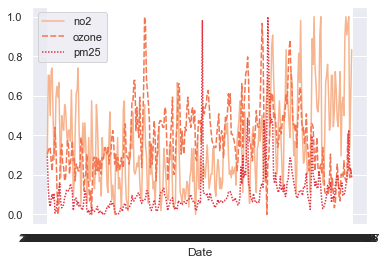

In [78]:



# data = normalized_df.no2.rolling(7).mean()
# sns.lineplot(data=data)

palette = sns.color_palette("rocket_r")

for col in normalized_df.columns:
    if col == 'Date':
        continue
#     sns.kdeplot(normalized_df[col], shade=True)
sns.lineplot(data=normalized_df, palette=palette[:3])





# normalized_df['no2'].plot()
# plt.axvline(x=STATE_HOME_DATE, color='blue')
sns.set_theme(style='darkgrid')




<AxesSubplot:xlabel='Date'>

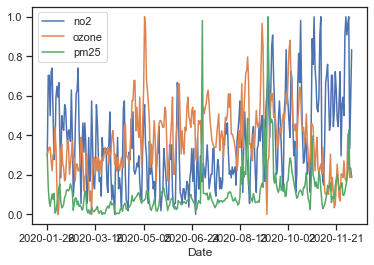

In [73]:
normalized_df.plot()